# Plotting - matplotlib
%matplotlib inline

We follow [Geo-Python](https://geo-python.github.io/2017/lessons/L7/pandas-plotting.html#parsing-datetime-when-reading-data)
from University of Helsinki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import requests as rq

url = "https://geo-python.github.io/2017/_static/data/L7/1924927457196dat.txt"
text = io.StringIO(rq.get(url).content.decode('utf-8'))

for x in range(0, 3):
    print(text.readline())

  USAF  WBAN YR--MODAHRMN DIR SPD GUS CLG SKC L M H  VSB MW MW MW MW AW AW AW AW W TEMP DEWP    SLP   ALT    STP MAX MIN PCP01 PCP06 PCP24 PCPXX SD

029750 99999 201201010050 280   3 ***  89 BKN * * *  7.0 ** ** ** ** ** ** ** ** *   28   25 ****** 29.74 ****** *** *** ***** ***** ***** ***** ** 

029750 99999 201201010150 310   3 ***  89 OVC * * *  7.0 ** ** ** ** ** ** ** ** *   27   25 ****** 29.77 ****** *** *** ***** ***** ***** ***** ** 



In [2]:
data = pd.read_csv((io.StringIO(rq.get(url).content.decode('utf-8'))), 
                 sep='\s+', parse_dates=['YR--MODAHRMN'], 
                 na_values=['*', '**', '***', '****', '*****', '******'])
data.head(3)

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,29750,99999,2012-01-01 00:50:00,280.0,3,NaN,89.0,BKN,NaN,NaN,...,NaN,29.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29750,99999,2012-01-01 01:50:00,310.0,3,NaN,89.0,OVC,NaN,NaN,...,NaN,29.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29750,99999,2012-01-01 02:50:00,280.0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,29.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Select data
selected_cols = ['YR--MODAHRMN', 'TEMP', 'SPD']
data = data[selected_cols]

# Rename columns
name_conversion = {'YR--MODAHRMN': 'TIME', 'SPD': 'SPEED'}
data = data.rename(columns=name_conversion)

# Convert Fahrenheit temperature into Celsius
data['Celsius'] = (data['TEMP'] - 32) / 1.8

data.head(3)

,TIME,TEMP,SPEED,Celsius
0,2012-01-01 00:50:00,28.0,3,-2.222222
1,2012-01-01 01:50:00,27.0,3,-2.777778
2,2012-01-01 02:50:00,25.0,1,-3.888889


## Basic plot in Pandas

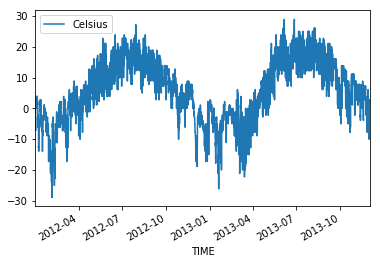

In [4]:
data.plot(x='TIME', y='Celsius');

## Selecting data based on time in Pandas

In [5]:
data = data.set_index('TIME')
data.head(3)

,TEMP,SPEED,Celsius
TIME,,,
2012-01-01 00:50:00,28.0,3,-2.222222
2012-01-01 01:50:00,27.0,3,-2.777778
2012-01-01 02:50:00,25.0,1,-3.888889


We select only the observation on January first

In [6]:
first_jan = data['2013-01-01': '2013-01-01']
first_jan.head(3)

,TEMP,SPEED,Celsius
TIME,,,
2013-01-01 00:50:00,34.0,13,1.111111
2013-01-01 01:50:00,36.0,10,2.222222
2013-01-01 02:50:00,36.0,10,2.222222


We can be more selective by denoting also the hour

In [7]:
first_jan_12h_to_14th = data['2013-01-01 12:00': '2013-01-01 14:00']
first_jan_12h_to_14th.head(3)

,TEMP,SPEED,Celsius
TIME,,,
2013-01-01 12:50:00,37.0,16,2.777778
2013-01-01 13:50:00,37.0,14,2.777778


## Using of `resample()`

In [8]:
daily = data.resample(rule='D').mean() # rule='D' stays for daily
daily.head()

,TEMP,SPEED,Celsius
TIME,,,
2012-01-01,25.250000,3.791667,-3.750000
2012-01-02,33.130435,14.739130,0.628019
2012-01-03,37.333333,6.333333,2.962963
2012-01-04,37.041667,16.041667,2.800926
2012-01-05,36.583333,8.541667,2.546296


In [24]:
hourly = data['2013-01-01': '2013-01-01'].resample(rule='H').mean() # rule='H' stays for hourly
hourly.head()

,TEMP,SPEED,Celsius
TIME,,,
2013-01-01 00:00:00,34.0,13,1.111111
2013-01-01 01:00:00,36.0,10,2.222222
2013-01-01 02:00:00,36.0,10,2.222222
2013-01-01 03:00:00,37.0,11,2.777778
2013-01-01 04:00:00,37.0,13,2.777778


We can now plot the **daily** data.
For more on plots with Pandas see [here](https://pandas.pydata.org/pandas-docs/stable/visualization.html).

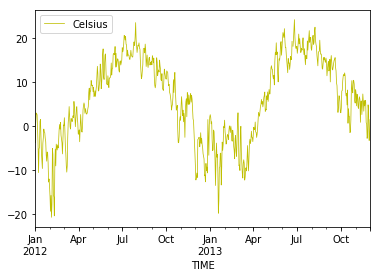

In [9]:
fig = daily.plot(y='Celsius', kind='line', lw=0.75, c='y').get_figure();
# `c` sets the color
# `lw` sets the line width
fig.show() 

To save the picture you can use the command

In [10]:
fig.savefig("output.png", dpi=150);

## Making subplots
We use the style `seaborn-whitegrid`, to check for other styles look [here](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)

In [11]:
print(plt.style.available)

['seaborn-talk', 'dark_background', 'seaborn-paper', 'seaborn-poster', 'seaborn-dark-palette', '_classic_test', 'seaborn', 'seaborn-darkgrid', 'fast', 'seaborn-deep', 'bmh', 'seaborn-whitegrid', 'grayscale', 'classic', 'ggplot', 'seaborn-white', 'tableau-colorblind10', 'fivethirtyeight', 'seaborn-muted', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-dark', 'seaborn-ticks', 'seaborn-pastel', 'Solarize_Light2']


In [12]:
plt.style.use('seaborn-whitegrid')

In [13]:
winter = daily['2012-12-01': '2013-02-28']
spring = daily['2013-03-01': '2013-05-31']
summer = daily['2013-06-01': '2013-08-31']
fall = daily['2013-09-01': '2013-11-30']

In [14]:
winter.head()

,TEMP,SPEED,Celsius
TIME,,,
2012-12-01,15.500000,6.083333,-9.166667
2012-12-02,10.041667,3.416667,-12.199074
2012-12-03,11.125000,3.791667,-11.597222
2012-12-04,12.875000,5.750000,-10.625000
2012-12-05,11.083333,3.791667,-11.620370


Let us compute minimum and maximum temperature

In [15]:
min_temp = daily['Celsius'].min() - 5
max_temp = daily['Celsius'].max() + 5
print("Min: %d, Max: %d" % (min_temp, max_temp))

Min: -25, Max: 29


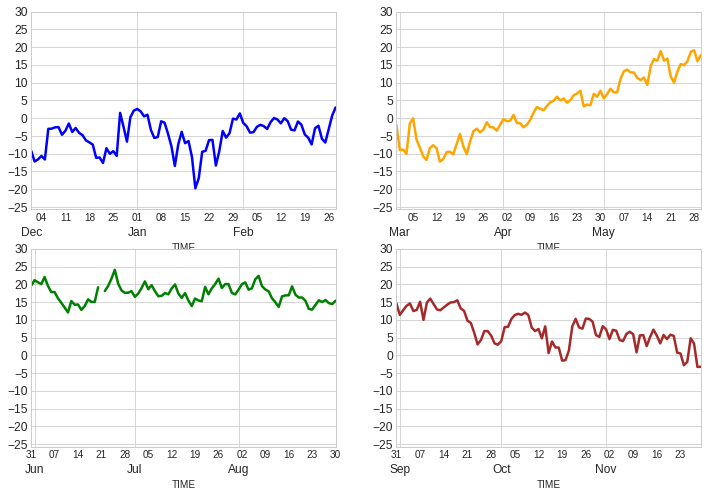

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
line_width = 2.5
winter.plot(y='Celsius', ax=axes[0][0], c='blue', legend=False, lw=line_width, ylim=(min_temp, max_temp));
spring.plot(y='Celsius', ax=axes[0][1], c='orange', legend=False, lw=line_width, ylim=(min_temp, max_temp));
summer.plot(y='Celsius', ax=axes[1][0], c='green', legend=False, lw=line_width, ylim=(min_temp, max_temp));
fall.plot(  y='Celsius', ax=axes[1][1], c='brown', legend=False, lw=line_width, ylim=(min_temp, max_temp));

step = 3

if step > 0:
    yticks = np.arange(start=-25, stop=31, step=5)

if step > 1:
    import itertools
    for ax in list(itertools.chain(*axes)):
        # Clear x axis ticks
        ax.get_xaxis().set_ticks([])
        # Specifu y-axis ticks
        ax.yaxis.set_ticks(yticks)
        # Specify major tick-label sizes larger
        ax.tick_params(axis='both', which='major', labelsize=12)

if step > 2:
    from matplotlib import dates

    # Iterate over all four axes that we have and apply same procedures to each one of them
    for ax in list(itertools.chain(*axes)):
        # Set minor ticks with day numbers
        ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
        ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
        # Set major ticks with month names
        ax.xaxis.set_major_locator(dates.MonthLocator())
        ax.xaxis.set_major_formatter(dates.DateFormatter('\n%b'))

# Plotting - seaborn

Seaborn is a package built on top of matplotlib 
 that makes easy to plot data by offering a large variety of 
 predefined plots.
 
To checkout the package go [here](https://seaborn.pydata.org/index.html) 

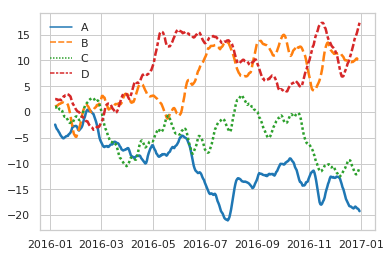

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365) # set seed
values = rs.randn(365, 4).cumsum(axis=0) # generate 4 random walks
dates = pd.date_range("1 1 2016", periods=365, freq="D") # create list of days
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"]) # create DataFrame
data = data.rolling(7).mean() # make week averages

sns.lineplot(data=data, palette="tab10", linewidth=2.5)